In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.anaconda', '.angular-config.json', '.cn1', '.codenameone', '.conda', '.condarc', '.config', '.dbshell', '.dotnet', '.eclipse', '.gitconfig', '.ipynb_checkpoints', '.ipython', '.jupyter', '.lemminx', '.m2', '.matplotlib', '.mongorc.js', '.nbi', '.node_repl_history', '.nuget', '.openjfx', '.oracle_jre_usage', '.Origin', '.p2', '.packettracer', '.PhpStorm2019.2', '.QtWebEngineProcess', '.soapuios', '.templateengine', '.tooling', '.vscode', '.windows-build-tools', '3D Objects', 'ansel', 'AppData', 'Application Data', 'arbrededecision.ipynb', 'BrawlhallaReplays', 'Calcul Scientifique TP1_Résolution de SEL.ipynb', 'Cisco Packet Tracer 7.1.1', 'Contacts', 'Cookies', 'covid_diagnostic .ipynb', 'db_2021_02_13_17_12_14.txt', 'default-soapui-workspace.xml', 'Desktop', 'Documents', 'Downloads', 'eclipse', 'eclipse-workspace', 'Favorites', 'firstplot.png', 'flex', 'GestionProduitsDB.mdf', 'GestionProduitsDB2.mdf', 'GestionProduitsDB2_log.ldf', 'GestionProduitsDB_log.ldf', 'heart_diagnostic.ipynb

In [5]:
dataset = pd.read_csv("C:/Users/ali/Desktop/Heart-Disease-Prediction-using-Machine-Learning-master/Breast_train.csv")

In [6]:
type(dataset)

pandas.core.frame.DataFrame

In [7]:
dataset.shape

(569, 6)

In [8]:
dataset.head(5)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [9]:
dataset.sample(5)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
432,20.180,19.54,133.80,1250.0,0.1133,0
517,19.890,20.26,130.50,1214.0,0.1037,0
359,9.436,18.32,59.82,278.6,0.1009,1
535,20.550,20.86,137.80,1308.0,0.1046,0
335,17.060,21.00,111.80,918.6,0.1119,0


In [10]:
dataset.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
mean_radius        569 non-null float64
mean_texture       569 non-null float64
mean_perimeter     569 non-null float64
mean_area          569 non-null float64
mean_smoothness    569 non-null float64
diagnosis          569 non-null int64
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [12]:
dataset["diagnosis"].describe()

count    569.000000
mean       0.627417
std        0.483918
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: diagnosis, dtype: float64

In [14]:
dataset["diagnosis"].unique()

array([0, 1], dtype=int64)

In [15]:
print(dataset.corr()["diagnosis"].abs().sort_values(ascending=False))

diagnosis          1.000000
mean_perimeter     0.742636
mean_radius        0.730029
mean_area          0.708984
mean_texture       0.415185
mean_smoothness    0.358560
Name: diagnosis, dtype: float64


1    357
0    212
Name: diagnosis, dtype: int64


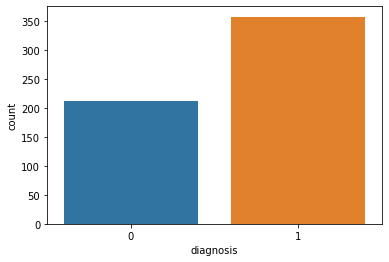

In [17]:
y = dataset["diagnosis"]

sns.countplot(y)


target_temp = dataset.diagnosis.value_counts()

print(target_temp)

In [18]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("diagnosis",axis=1)
target = dataset["diagnosis"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [19]:
X_train.shape

(455, 5)

In [20]:
X_test.shape

(114, 5)

In [21]:
Y_train.shape

(455,)

In [22]:
Y_test.shape

(114,)

##  Model Fitting

In [23]:
from sklearn.metrics import accuracy_score

### Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [25]:
Y_pred_lr.shape

(114,)

In [26]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 92.11 %


### Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [28]:
Y_pred_nb.shape

(114,)

In [29]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 92.98 %


### SVM

In [30]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [31]:
Y_pred_svm.shape

(114,)

In [32]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 91.23 %


### K Nearest Neighbors

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [34]:
Y_pred_knn.shape

(114,)

In [35]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 90.35 %


### Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [37]:
print(Y_pred_dt.shape)

(114,)


In [38]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 88.6 %


### Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [42]:
Y_pred_rf.shape

(114,)

In [43]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 95.61 %


In [44]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 92.11 %
The accuracy score achieved using Naive Bayes is: 92.98 %
The accuracy score achieved using Support Vector Machine is: 91.23 %
The accuracy score achieved using K-Nearest Neighbors is: 90.35 %
The accuracy score achieved using Decision Tree is: 88.6 %
The accuracy score achieved using Random Forest is: 95.61 %


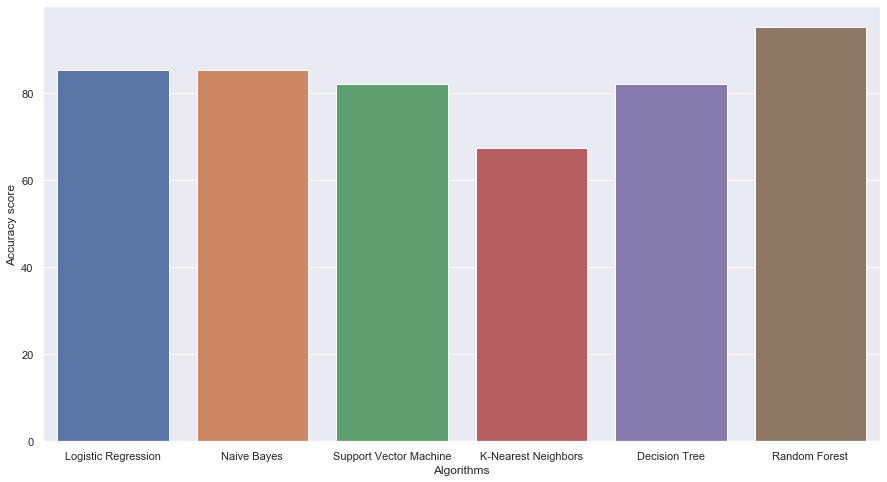

In [49]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

In [50]:
Xnew = [[9.81,2.15,20,1240,0.09831]]
# make a prediction
ynew = rf.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))


X=[9.81, 2.15, 20, 1240, 0.09831], Predicted=1
